# Simulating the statistics of time discreteness

This notebook has been used to generate the plots in Figures 3 and 4 of [arXiv:2007.08431](www.arXiv.org/abs/2007.08431)

In [1]:
import random, math, statistics
import matplotlib.pyplot as plt
import numpy as np

First, we enter the parameters in Planck units.
The notation is very close to that of the main text.

In [2]:
t = 2.*10**(42)               # Free Fall time
m = 1.4*10**(-2)              # Mass in superposition
M = 10*m                      # Source Mass
l = 6.2*10**(27)              # Superposition size

tau_min, tau_max = 0, 10      # the range of values of delta_tau explored
N_data_points = 100           # Number of data points that will be displayed
N_samples = int(10**6)        # Number of runs per data points.

# the values of delta_tau that will be sampled
tau_range = np.linspace(tau_min, tau_max, N_data_points)[1:-1]

# Fractional uncertainties on the experimental parameters
frac_t, frac_d, frac_l = 1/1000, 1/1000, 1/100

# Maximum gravity perturbation
A_max = 1/(5*t*l) 

Useful functions

In [3]:
def beta(M,d,l, ideal=False):
    if ideal:
        return d*(d+l)/(M*l)
    else:
        sampled_d = random.gauss(d,d*frac_d)
        sampled_l = random.gauss(l,l*frac_l)
        return beta(M,sampled_d,sampled_l,ideal=True)

def delta_tau(t,M,d,l, ideal=False, noise=False):
    if noise:
        sampled_A = (2*random.random()-1)*A_max
    else:
        sampled_A = 0
    if ideal:
        return t/beta(M,d,l,ideal=True) + sampled_A*t*l
    else:
        sampled_t = random.gauss(t,t*frac_t)
        return sampled_t / beta(M,d,l,ideal=False) + sampled_A*t*l
    
def floor(n):
    return n // 1

def project(probability):
    return random.random() < probability

In [4]:
def p_discrete(t,m,M,d,l,ideal=True,noise=False):
    return 0.5 + 0.5*math.sin(m*floor(delta_tau(t,M,d,l,ideal=ideal,noise=noise)))

def p_smooth(t,m,M,d,l,ideal=True,noise=False):
    return 0.5 + 0.5*math.sin(m*delta_tau(t,M,d,l,ideal=ideal,noise=noise))

In [5]:
def discrete_data_point(t,m,M,d,l,ideal=False,noise=False):
    total = 0
    for i in range(N_samples):
        total += project(p_discrete(t,m,M,d,l,ideal=ideal,noise=noise))
    return total/N_samples

## Preliminary plot


In [6]:
# calculating the values of d to sample the necessary values of delta_tau
beta_range = [t/tau for tau in tau_range]
d_range = [-0.5*l + 0.5*math.sqrt(l**2+4*beta*M*l) for beta in beta_range]

Text(0, 0.5, 'probabilities')

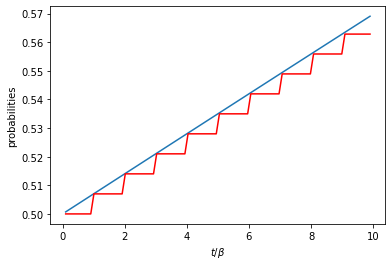

In [7]:
x = tau_range
y = [p_smooth(t,m,M,d,l,ideal=True) for d in d_range]
z = [p_discrete(t,m,M,d,l,ideal=True) for d in d_range]
plt.plot(x, y, x,z,'r-')
plt.xlabel(r'$t/\beta$')
plt.ylabel('probabilities')

## Simulating with different values of $\Delta l$

The simulations take a while to run, but they work.

In [8]:
frac_l_range = (1/10, 1/50, 1/100)

A_max = 0
experimental_discrete_uncertain = {}
for f in frac_l_range:
    frac_l = f
    experimental_discrete_uncertain[(frac_l,A_max)] = [discrete_data_point(t,m,M,d,l) for d in d_range]
    print("({},{}): ".format(frac_l, A_max))
    print(experimental_discrete_uncertain[(frac_l,A_max)])

(0.1,0): 
[0.499638, 0.50058, 0.499973, 0.499867, 0.499289, 0.500026, 0.500584, 0.500163, 0.50142, 0.503546, 0.505364, 0.50702, 0.506612, 0.50691, 0.506723, 0.507173, 0.50679, 0.50757, 0.508988, 0.510779, 0.512357, 0.511772, 0.513425, 0.514572, 0.51468, 0.514155, 0.515265, 0.516241, 0.517054, 0.518585, 0.519245, 0.519103, 0.520091, 0.52007, 0.521412, 0.520846, 0.522748, 0.523184, 0.523391, 0.524271, 0.525727, 0.52608, 0.527544, 0.527434, 0.528822, 0.528751, 0.530007, 0.530522, 0.531054, 0.531402, 0.531689, 0.532736, 0.534039, 0.534683, 0.536454, 0.537228, 0.536554, 0.537604, 0.538072, 0.539646, 0.539618, 0.539982, 0.540209, 0.542269, 0.541593, 0.543732, 0.543469, 0.543909, 0.545117, 0.546138, 0.546825, 0.547434, 0.547484, 0.549122, 0.549028, 0.550095, 0.551058, 0.5514, 0.552906, 0.552517, 0.55372, 0.554516, 0.555958, 0.556218, 0.557406, 0.556854, 0.556853, 0.557836, 0.559883, 0.559795, 0.560326, 0.561918, 0.56274, 0.563707, 0.563355, 0.563504, 0.564547, 0.566355]
(0.02,0): 
[0.499766, 

Creating one plot

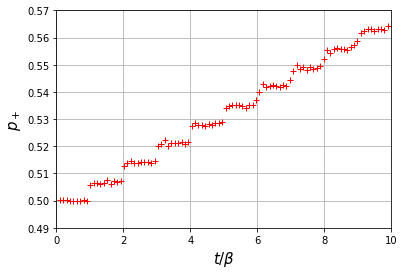

In [9]:
x = tau_range
best = experimental_discrete_uncertain[(0.01,0)]
middle = experimental_discrete_uncertain[(0.02,0)]
worst = experimental_discrete_uncertain[(0.1,0)]


plt.plot(x,best,'r+')
#plt.plot(x,middle,'g*')
#plt.plot(x,worst,'b-')

plt.grid(True)
label_size = 15
plt.xlabel(r'$t/\beta$', size=label_size)
plt.ylabel(r'$p_+$', size=label_size)
plt.axis([0, 10, 0.49, 0.57])
plt.grid(True)
#plt.savefig('worst.pdf',dpi=1000) #uncomment this line to save plot

Creating multiple plots

Text(0.655, 0.192, '$\\Delta l = l~/~100$')

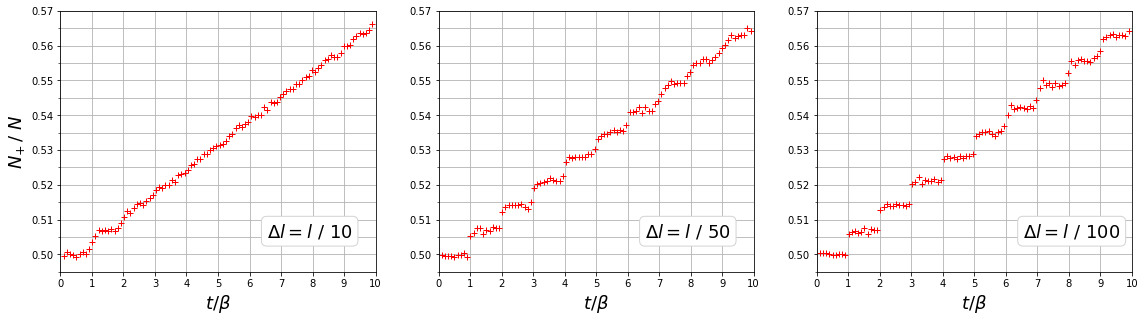

In [10]:
x = tau_range
best = experimental_discrete_uncertain[(0.01,0)]
middle = experimental_discrete_uncertain[(0.02,0)]
worst = experimental_discrete_uncertain[(0.1,0)]

def add_cosmetics(ax):
    #ax.legend(loc=(.735,.12),fontsize='x-large',framealpha=1,shadow=False)
    ax.axis([0, 10, 0.495, 0.57])
    ax.set_xticks(np.arange(0,11))
    ax.set_yticks(np.arange(.495,.566,.005),minor=True)
    ax.grid(True,which='both')
    
    



fig = plt.figure(figsize=[6.4*3, 4.8])
label_size = 18
props = dict(boxstyle='round', facecolor='white', alpha=1, ec='lightgrey')

ax = fig.add_subplot(1, 3, 1)
ax.plot(tau_range, worst, 'r+',label='$P_+$')
add_cosmetics(ax)
plt.xlabel(r'$t/\beta$', size=label_size)
plt.ylabel(r'$N_{\!+}/~N$', size=label_size)
ax.text(.655,.192, r'$\Delta l = l~/~10$', transform=ax.transAxes, fontsize=label_size,
        verticalalignment='top', bbox=props)

ax=fig.add_subplot(1,3,2)
ax.plot(tau_range, middle, 'r+',label='$P_+$')
add_cosmetics(ax)
plt.xlabel(r'$t/\beta$', size=label_size)
ax.text(.655,.192, r'$\Delta l = l~/~50$', transform=ax.transAxes, fontsize=label_size,
        verticalalignment='top', bbox=props)

ax=fig.add_subplot(1,3,3)
ax.plot(tau_range, best, 'r+',label='$P_+$')
add_cosmetics(ax)
plt.xlabel(r'$t/\beta$', size=label_size)
ax.text(.655,.192, r'$\Delta l = l~/~100$', transform=ax.transAxes, fontsize=label_size,
        verticalalignment='top', bbox=props)


#plt.savefig('simulations.pdf',dpi=500) #uncomment this line to save plot

## Simulating for different values of $A_{max}$

In [11]:
grav_noise = (1/20, 1/5, 1/2)

frac_l = 1/100
experimental_discrete_uncertain_noise = {}
for A in grav_noise:
    A_max = A/(t*l)
    experimental_discrete_uncertain_noise[(frac_l, A)] = [discrete_data_point(t,m,M,d,l,noise=True) for d in d_range]
    print("({},{}): ".format(frac_l, A))
    print(experimental_discrete_uncertain_noise[(frac_l, A)])

(0.01,0.05): 
[0.500157, 0.499689, 0.500056, 0.500318, 0.499808, 0.500655, 0.499661, 0.499534, 0.500535, 0.504772, 0.507669, 0.507223, 0.506723, 0.507256, 0.506463, 0.506464, 0.507085, 0.507, 0.507851, 0.511038, 0.513964, 0.51436, 0.514052, 0.514605, 0.513876, 0.513916, 0.513498, 0.513439, 0.513519, 0.520061, 0.521414, 0.520235, 0.521765, 0.521132, 0.520739, 0.520742, 0.520985, 0.520958, 0.522149, 0.526767, 0.527665, 0.527547, 0.52796, 0.527925, 0.527594, 0.527332, 0.528077, 0.528065, 0.529773, 0.533089, 0.534575, 0.534687, 0.534407, 0.534515, 0.535078, 0.535195, 0.534783, 0.535651, 0.536946, 0.540797, 0.541357, 0.541135, 0.541774, 0.542149, 0.541662, 0.542067, 0.542223, 0.541545, 0.544694, 0.548449, 0.548792, 0.547853, 0.54938, 0.548501, 0.547303, 0.549254, 0.548575, 0.549815, 0.551653, 0.555109, 0.555595, 0.555771, 0.5566, 0.555784, 0.557212, 0.555489, 0.555307, 0.55588, 0.559165, 0.563139, 0.562942, 0.561987, 0.563128, 0.563612, 0.5626, 0.562424, 0.562471, 0.564101]
(0.01,0.2): 
[0.

Text(0.55, 0.192, '$A_{max}\\cdot tl = 1/20$')

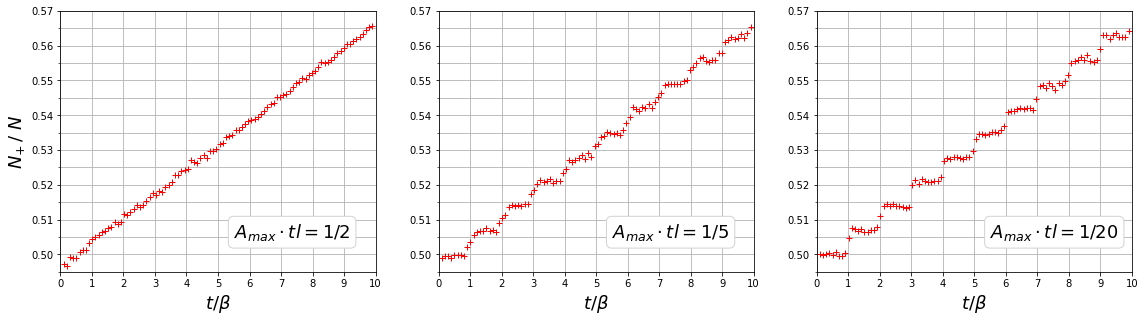

In [12]:
x = tau_range

best = experimental_discrete_uncertain_noise[(0.01,1/20)]
middle = experimental_discrete_uncertain_noise[(0.01,1/5)]
worst = experimental_discrete_uncertain_noise[(0.01,1/2)]



fig = plt.figure(figsize=[6.4*3, 4.8])
label_size = 18
props = dict(boxstyle='round', facecolor='white', alpha=1, ec='lightgrey')

ax = fig.add_subplot(1, 3, 1)
ax.plot(tau_range, worst, 'r+',label='$P_+$')
add_cosmetics(ax)
plt.xlabel(r'$t/\beta$', size=label_size)
plt.ylabel(r'$N_{\!+}/~N$', size=label_size)
ax.text(.55,.192, r'$A_{max}\cdot tl = 1/2$', transform=ax.transAxes, fontsize=label_size,
        verticalalignment='top', bbox=props)

ax=fig.add_subplot(1,3,2)
ax.plot(tau_range, middle, 'r+',label='$P_+$')
add_cosmetics(ax)
plt.xlabel(r'$t/\beta$', size=label_size)
ax.text(.55,.192, r'$A_{max}\cdot tl = 1/5$', transform=ax.transAxes, fontsize=label_size,
        verticalalignment='top', bbox=props)

ax=fig.add_subplot(1,3,3)
ax.plot(tau_range, best, 'r+',label='$P_+$')
add_cosmetics(ax)
plt.xlabel(r'$t/\beta$', size=label_size)
ax.text(.55,.192, r'$A_{max}\cdot tl = 1/20$', transform=ax.transAxes, fontsize=label_size,
        verticalalignment='top', bbox=props)


# plt.savefig('simulations_grav.pdf',dpi=500) #uncomment this line to save plot